In [13]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchinfo import summary
import pandas as pd
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from pathlib import Path
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('images.csv')

In [3]:
class MRIDataset(Dataset):
    def __init__(self, df: pd.DataFrame):
        scores = df['score'].to_numpy()
        self.length = len(scores)

        self.y = np.zeros((self.length, 2))
        for i in range(self.length):
            j = 1 if scores[i] == 3 else 0
            self.y[i][j] = 1
        
        self.filenames = df['filename'].to_numpy()

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        img = nib.load(filename)

        raw = img.get_fdata()
        raw = raw / raw.mean()
        raw = raw.reshape((1, *raw.shape))

        X = torch.FloatTensor(raw)
        y = torch.FloatTensor(self.y[idx])

        return X, y

In [4]:
ds = MRIDataset(df)

In [8]:
df.head()

,Unnamed: 0,filename,score
0,0,ds004173/sub-009673/anat/sub-009673_acq-standa...,1
1,1,ds004173/sub-009673/anat/sub-009673_acq-headmo...,2
2,2,ds004173/sub-009673/anat/sub-009673_acq-headmo...,3
3,3,ds004173/sub-307592/anat/sub-307592_acq-standa...,1
4,4,ds004173/sub-307592/anat/sub-307592_acq-headmo...,3


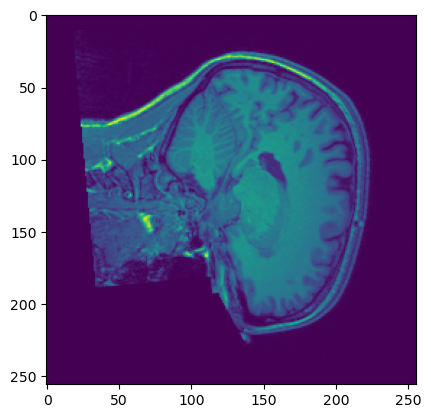

In [16]:
plt.imshow(ds[0][0].numpy()[0, 80, :, :])


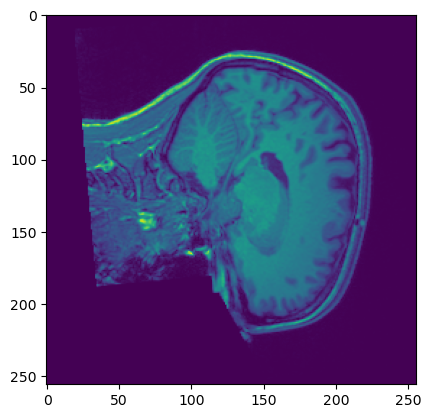

In [17]:
plt.imshow(ds[1][0].numpy()[0, 80, :, :])


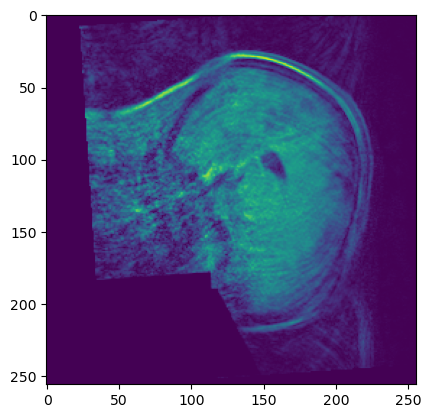

In [18]:
plt.imshow(ds[2][0].numpy()[0, 80, :, :])